In [1]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["C:/Users/kwon3/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

- 데이터 경로 변수

In [3]:
# DATA_PATH = "/content/drive/MyDrive/파이널프로젝트/data/"
# DATA_PATH

In [4]:
DATA_PATH = "data/"
DATA_PATH

'data/'

- 시드값

In [5]:
SEED = 42

- 데이터 불러오기

In [6]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [7]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 798), (12225, 798))

- 정답 데이터

In [11]:
target = train_target["target"]
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
14935    0.0
14936    0.0
14937    0.0
14938    1.0
14939    1.0
Name: target, Length: 14940, dtype: float64

# 결측치 처리

In [12]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

구매금액표준편차          405
구매금액_skew         880
구매금액_kurtosis    1340
구매금액_변동성          405
환불건수             6221
총환불금액            6221
평균환불금액           6221
최소환불금액           6221
최대환불금액           6221
환불금액표준편차         9222
고가제품환불비율         6221
중가제품환불비율         6221
저가제품환불비율         6221
구매금액_대비_환불금액     6221
환불건수_대비_구매건수     6221
dtype: int64

In [13]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

구매금액표준편차          262
구매금액_skew         631
구매금액_kurtosis    1006
구매금액_변동성          262
환불건수             4972
총환불금액            4972
평균환불금액           4972
최소환불금액           4972
최대환불금액           4972
환불금액표준편차         7347
고가제품환불비율         4972
중가제품환불비율         4972
저가제품환불비율         4972
구매금액_대비_환불금액     4972
환불건수_대비_구매건수     4972
dtype: int64

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [14]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 797), (12225, 797))

- 추가 피처 만들어 보기

In [15]:
cols = [ col for col in train_ft.columns if col.startswith("지점코드_구매횟수_") ]

train_ft["지점코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["지점코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["지점코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["지점코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["지점코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["지점코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 800), (12225, 800))

In [16]:
cols = [ col for col in train_ft.columns if col.startswith("지점코드_구매합계_") ]

train_ft["지점코드별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["지점코드별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["지점코드별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["지점코드별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["지점코드별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["지점코드별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 803), (12225, 803))

In [17]:
cols = [ col for col in train_ft.columns if col.startswith("중분류_구매횟수_") ]

train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 806), (12225, 806))

In [18]:
cols = [ col for col in train_ft.columns if col.startswith("중분류_구매합계_") ]

train_ft["중분류별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["중분류별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["중분류별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["중분류별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["중분류별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["중분류별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 809), (12225, 809))

In [19]:
cols = [ col for col in train_ft.columns if col.startswith("대분류_구매횟수_") ]

train_ft["대분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
train_ft["대분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
train_ft["대분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["대분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
test_ft["대분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
test_ft["대분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 812), (12225, 812))

In [20]:
cols = [ col for col in train_ft.columns if col.startswith("대분류_구매합계_") ]

train_ft["대분류별_구매합계_std"] = train_ft[cols].std(axis=1)
train_ft["대분류별_구매합계_skew"] = train_ft[cols].skew(axis=1)
train_ft["대분류별_구매합계_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["대분류별_구매합계_std"] = test_ft[cols].std(axis=1)
test_ft["대분류별_구매합계_skew"] = test_ft[cols].skew(axis=1)
test_ft["대분류별_구매합계_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 815), (12225, 815))

In [21]:
cols = [ col for col in train_ft.columns if col.endswith("요일_구매비율") ]

train_ft["요일별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["요일별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["요일별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["요일별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["요일별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["요일별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 818), (12225, 818))

In [22]:
cols = [ col for col in train_ft.columns if col.endswith("월_구매비율") ]

train_ft["월별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["월별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["월별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["월별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["월별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["월별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 821), (12225, 821))

In [23]:
cols = ["봄_구매비율","여름_구매비율","가을_구매비율","겨울_구매비율"]

train_ft["계절별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["계절별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["계절별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["계절별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["계절별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["계절별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 824), (12225, 824))

In [24]:
cols = [ col for col in train_ft.columns if col.endswith("분기_구매비율") ]

train_ft["분기별_구매비율_std"] = train_ft[cols].std(axis=1)
train_ft["분기별_구매비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["분기별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["분기별_구매비율_std"] = test_ft[cols].std(axis=1)
test_ft["분기별_구매비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["분기별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 827), (12225, 827))

In [25]:
cols = [ col for col in train_ft.columns if col.endswith("년_구매비율") ]

train_ft["년도별_구매비율_std"] = train_ft[cols].std(axis=1)
test_ft["년도별_구매비율_std"] = test_ft[cols].std(axis=1)

train_ft.shape, test_ft.shape

((14940, 828), (12225, 828))

In [26]:
cols_지점 = [col for col in train_ft.columns if col.startswith("지점코드_구매횟수_")]
cols_중분류 = [col for col in train_ft.columns if col.startswith("중분류_구매횟수_")]
cols_대분류 = [col for col in train_ft.columns if col.startswith("대분류_구매횟수_")]

train_ft["구매집중도_지점"] = train_ft[cols_지점].max(axis=1) / train_ft[cols_지점].sum(axis=1)
train_ft["구매집중도_중분류"] = train_ft[cols_중분류].max(axis=1) / train_ft[cols_중분류].sum(axis=1)
train_ft["구매집중도_대분류"] = train_ft[cols_대분류].max(axis=1) / train_ft[cols_대분류].sum(axis=1)

test_ft["구매집중도_지점"] = test_ft[cols_지점].max(axis=1) / test_ft[cols_지점].sum(axis=1)
test_ft["구매집중도_중분류"] = test_ft[cols_중분류].max(axis=1) / test_ft[cols_중분류].sum(axis=1)
test_ft["구매집중도_대분류"] = test_ft[cols_대분류].max(axis=1) / test_ft[cols_대분류].sum(axis=1)

train_ft.shape, test_ft.shape

((14940, 831), (12225, 831))

## Feature Encoding

- 범주형 피처
    - 주구매_중분류, 주구매_대분류, 선호브랜드코드, 고객등급

In [27]:
# %pip install category_encoders

In [28]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

oh_enc = OneHotEncoder(handle_unknown="ignore")
oh_enc_cols = ["고객등급"]
oh_enc_data = pd.concat([train_ft[oh_enc_cols], test_ft[oh_enc_cols]])
oh_enc.fit(oh_enc_data)

train_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(train_ft[oh_enc_cols]).toarray()
test_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(test_ft[oh_enc_cols]).toarray()

train_ft.shape, test_ft.shape

((14940, 836), (12225, 836))

In [29]:
train_ft['선호브랜드코드'] = train_ft['선호브랜드코드'].astype('category')
test_ft['선호브랜드코드'] = test_ft['선호브랜드코드'].astype('category')

combined_brands = pd.concat([train_ft['선호브랜드코드'], test_ft['선호브랜드코드']])

enc = ce.CountEncoder()
train_ft["선호브랜드코드_cnt"] = enc.fit_transform(train_ft[['선호브랜드코드']])
test_ft["선호브랜드코드_cnt"] = enc.transform(test_ft[['선호브랜드코드']])

train_ft.drop(columns=["선호브랜드코드"], inplace=True)
test_ft.drop(columns=["선호브랜드코드"], inplace=True)

train_ft.shape, test_ft.shape

((14940, 836), (12225, 836))

- 문자열 피처 삭제

In [30]:
cols = train_ft.select_dtypes(["object", "datetime"]).columns.tolist()
cols

['고객등급']

In [31]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 835), (12225, 835))

In [32]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

In [33]:
train_ft.select_dtypes("datetime").columns, test_ft.select_dtypes("datetime").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Feature Scaling

In [34]:
train_ft.isin([np.inf, -np.inf]).any().sum(), test_ft.isin([np.inf, -np.inf]).any().sum()

(0, 0)

In [35]:
train_ft = train_ft.fillna(0)
test_ft = test_ft.fillna(0)

In [36]:
train_ft.isna().sum().sum(), test_ft.isna().sum().sum()

(0, 0)

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer
scaler = StandardScaler()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

,총방문일수,백화점이용기간,구매주기,주말방문일수,일별평균구매건수,구매간격_표준편차,평균구매요일,주구매요일,월요일_구매비율,화요일_구매비율,...,년도별_구매비율_std,구매집중도_지점,구매집중도_중분류,구매집중도_대분류,고객등급_Black,고객등급_Diamond,고객등급_Gold,고객등급_Normal,고객등급_Platinum,선호브랜드코드_cnt
0,-0.441985,-0.031924,0.191603,-0.363618,-0.292817,0.019124,0.040957,-0.469891,-0.340771,-0.866857,...,1.098697,-1.950590,-0.386937,-1.041686,-0.303357,-0.133863,-0.204728,0.433781,-0.128585,-1.002992
1,0.202927,0.861742,-0.406568,-0.569238,0.470397,-0.545535,-0.799074,0.116688,-0.502484,0.896581,...,0.049208,-0.908632,-0.763771,-0.788616,-0.303357,-0.133863,-0.204728,0.433781,-0.128585,1.056804
2,2.030180,0.898594,-0.905045,1.486955,0.220618,-0.890269,-0.770108,-1.643049,0.905371,0.387353,...,-1.538254,0.115815,-0.793326,-0.825832,-0.303357,7.470347,-0.204728,-2.305310,-0.128585,-1.000947
3,3.911175,0.797251,-1.054588,3.131908,0.565798,-0.986871,0.139600,0.703267,-0.311925,-0.102556,...,-1.242595,-0.454032,-0.405270,-0.657977,-0.303357,7.470347,-0.204728,-2.305310,-0.128585,-0.940468
4,0.364155,0.502433,-0.556111,0.458858,-0.388218,-0.534063,1.088582,0.703267,-0.259915,-0.492795,...,0.498989,0.034092,-0.491613,-0.851883,-0.303357,-0.133863,-0.204728,0.433781,-0.128585,1.056804


# 차원축소

- 학습데이터에서 분산 임계값이 0인 경우 제외

In [38]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
vt.fit(train_ft)

train_vt = pd.DataFrame(vt.transform(train_ft), columns=train_ft.columns[vt.get_support()])
test_vt = test_ft[train_vt.columns]

train_vt.shape, test_vt.shape

((14940, 835), (12225, 835))

- 특성 간 상관관계 90% 이상인 경우 제거

In [39]:
# corr = train_vt.corr().abs()
# upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# to_drop = [col for col in upper.columns if any(upper[col] >= 0.90)]

# train_vt.drop(columns=to_drop, inplace=True)
# test_vt.drop(columns=to_drop, inplace=True)
# train_vt.shape, test_vt.shape

In [40]:
# train_vt.to_csv(f"{DATA_PATH}train_corr.csv",index=False)
# test_vt.to_csv(f"{DATA_PATH}test_corr.csv",index=False)

- cv 점수 확인

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
lgbm = LGBMClassifier(random_state=SEED, verbose=0, n_jobs=-1)
lgbm.fit(train_vt, target)

scores = cross_val_score(lgbm, train_vt, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

0.7207653890671797

- XAI 활용

c:\Users\kwon3\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


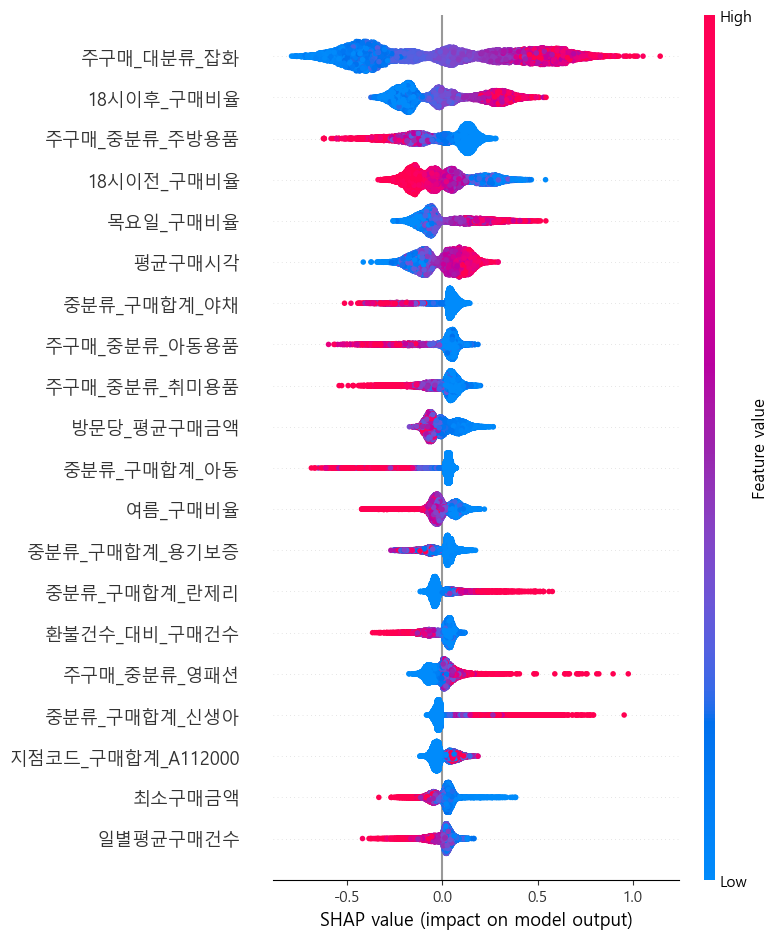

In [42]:
import shap

explainer = shap.Explainer(lgbm)
shap_values = explainer(train_vt)
shap.summary_plot(shap_values, train_vt)

- SelectFromModel

In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=SEED)
rf = RandomForestClassifier(random_state=SEED)

In [44]:
# # thresholds = [
# #     'mean', 'median',
# #     '0.5*mean', '1.5*mean', '2*mean',
# #     '0.5*median', '1.5*median', '2*median'
# # ]

# thresholds = [f"{i}*mean" for i in np.arange(0.6, 1.5, 0.1)]

# for threshold in thresholds:
#     sfm = SelectFromModel(lgbm, threshold=threshold)
#     sfm.fit(train_vt, target)
#     train_sfm = sfm.transform(train_vt)

#     scores = cross_val_score(lgbm, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(threshold, np.mean(scores), train_sfm.shape[1])

In [45]:
sfm = SelectFromModel(lgbm, threshold='1.2*mean')

train_sfm = sfm.fit_transform(train_vt, target)
test_sfm = sfm.transform(test_vt)

scores = cross_val_score(lgbm, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sfm.shape

(0.7216930015939027, (14940, 224))

In [46]:
# train_sfm = pd.DataFrame(np.array(train_sfm), columns=train_vt.columns[sfm.get_support()])
# test_sfm = pd.DataFrame(np.array(test_sfm), columns=test_vt.columns[sfm.get_support()])

# feature_importance = pd.DataFrame({
#     'feature': train_sfm.columns,
#     'score': sfm.estimator_.feature_importances_[sfm.get_support()]
# }).reset_index(drop=True)

# feature_importance.sort_values('score', ascending=False).head(10)

- SelectKBest

In [47]:
# from sklearn.feature_selection import SelectKBest

In [48]:
# for k in range(100, 201, 50):
#     skb = SelectKBest(k=k)
#     skb.fit(train_vt, target)
#     # skb.fit(train_sfm, target)
#     train_skb = skb.transform(train_vt)
#     # train_skb = skb.transform(train_sfm)

#     scores = cross_val_score(lgbm, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(f"특성수={k}, 정확도={np.mean(scores)}")

In [49]:
# skb = SelectKBest(k=600)

# train_skb = skb.fit_transform(train_vt, target)
# test_skb = skb.transform(test_vt)

# scores = cross_val_score(lgbm, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), train_skb.shape

In [50]:
# train_skb = pd.DataFrame(np.array(train_skb), columns=train_vt.columns[skb.get_support()])
# test_skb = pd.DataFrame(np.array(test_skb), columns=test_vt.columns[skb.get_support()])

# feature_scores = pd.DataFrame(
#     {'feature': train_vt.columns,
#      'score': skb.scores_}
# ).sort_values('score', ascending=False)

# feature_scores.head(10)

- SelectPercentile

In [51]:
# from sklearn.feature_selection import SelectPercentile

In [52]:
# percentiles = [i for i in range(5, 101, 5)]

# for percentile in percentiles:
#     sp = SelectPercentile(percentile=percentile)
#     sp.fit(train_vt, target)
#     # sp.fit(train_sfm, target)
#     train_sp = sp.transform(train_vt)
#     # train_sp = sp.transform(train_sfm)

#     scores = cross_val_score(lgbm, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

In [53]:
# sp = SelectPercentile(percentile=100)

# train_sp = sp.fit_transform(train_vt, target)
# test_sp = sp.transform(test_vt)

# scores = cross_val_score(lgbm, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), train_sp.shape

- PCA

In [54]:
# from sklearn.decomposition import PCA

In [55]:
# def do_pca(n_components, train, test, target, cv):
#     pca = PCA(n_components=n_components)

#     train_pca = pca.fit_transform(train)
#     test_pca = pca.transform(test)

#     scores = cross_val_score(lgbm, train_pca, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(np.mean(scores))
#     return pca, train_pca, test_pca

In [56]:
# pca, train_pca, test_pca = do_pca(0.9, train_vt, test_vt, target, cv)
# train_pca.shape, test_pca.shape

In [57]:
# pca2, train_pca2, test_pca2 = do_pca(0.9, train_sfm, test_sfm, target, cv)
# train_pca2.shape, test_pca2.shape

- TruncatedSVD

In [58]:
# from sklearn.decomposition import TruncatedSVD

In [59]:
# def do_svd(n_components, train, test, target, cv):
#     svd = TruncatedSVD(n_components=n_components)

#     train_svd = svd.fit_transform(train)
#     test_svd = svd.transform(test)

#     scores = cross_val_score(lgbm, train_svd, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(np.mean(scores))
#     return svd, train_svd, test_svd

In [60]:
# svd, train_svd, test_svd = do_svd(600, train_vt, test_vt, target, cv)

In [61]:
# svd2, train_svd2, test_svd2 = do_svd(200, train_sfm, test_sfm, target, cv)

- RandomProjection

In [62]:
# from sklearn.random_projection import GaussianRandomProjection
# from sklearn.random_projection import SparseRandomProjection

In [63]:
# grp = GaussianRandomProjection(600, random_state=SEED)

# grp_train = grp.fit_transform(train_vt, target)
# grp_test = grp.transform(test_vt)

# scores = cross_val_score(lgbm, grp_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), grp_train.shape

In [64]:
# srp = SparseRandomProjection(400, random_state=SEED)

# srp_train = srp.fit_transform(train_vt, target)
# srp_test = srp.transform(test_vt)

# scores = cross_val_score(lgbm, srp_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
# np.mean(scores), srp_train.shape

- LDA

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [66]:
def do_lda(n_components, train, target):
    X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=SEED)
    lda = LDA(n_components=n_components)
    lda = lda.fit(X_train, y_train)
    print(classification_report(y_val, lda.predict(X_val)))
    return lda

In [67]:
# lda_vt = do_lda(1, train_vt, target)
# train_lda = lda_vt.fit_transform(train_vt, target)
# test_lda = lda_vt.transform(test_vt)

In [68]:
lda_sfm = do_lda(1, train_sfm, target)
train_sfm_lda = lda_sfm.fit_transform(train_sfm, target)
test_sfm_lda = lda_sfm.transform(test_sfm)

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79      1801
         1.0       0.70      0.60      0.64      1187

    accuracy                           0.74      2988
   macro avg       0.73      0.71      0.72      2988
weighted avg       0.73      0.74      0.73      2988



- RFECV

In [69]:
from sklearn.feature_selection import RFECV

In [70]:
estimator = LogisticRegression(max_iter=1000, random_state=SEED)
rfecv = RFECV(estimator, step=10, cv=cv, scoring="f1_macro", n_jobs=-1)

train_rfecv = rfecv.fit_transform(train_vt, target)
test_rfecv = rfecv.transform(test_vt)

scores = cross_val_score(lgbm, train_rfecv, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

0.7191571194150841

In [71]:
# df = pd.DataFrame({
#     "Feature": train_vt.columns[rfecv.support_],
#     "Importance": np.abs(rfecv.estimator_.coef_).flatten()
# }).sort_values(by="Importance", ascending=False)

# df.head(10)

# 모델 선택

- 하이퍼파라미터 튜닝 클래스화

In [72]:
import optuna

class HyperarameterTuner:
    def __init__(self, model, params, train, target):
        self.model = model
        self.params = params
        self.train = train
        self.target = target
        self.cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        self.study = optuna.create_study(direction="maximize")

    def objective(self, trial):
        params = {}
        
        for param_name, param_range in self.params.items():
            if param_range["type"] == "int":
                params[param_name] = trial.suggest_int(
                    param_name, param_range["min"], param_range["max"]
                )
            elif param_range["type"] == "float":
                params[param_name] = trial.suggest_float(
                    param_name, param_range["min"], param_range["max"]
                )
            elif param_range["type"] == "categorical":
                params[param_name] = trial.suggest_categorical(
                    param_name, param_range["values"]
                )

        model = self.model(**params)
        scores = cross_val_score(
            model, self.train, self.target, cv=self.cv, scoring="f1_macro", n_jobs=-1
        ).mean()
        return scores

    def optimize(self, n_trials):
        self.study.optimize(self.objective, n_trials=n_trials)

    def best_params(self):
        return self.study.best_params

    def best_score(self):
        return self.study.best_value

## 원본 데이터에 대한 모델생성

In [73]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(train_vt, target, test_size=0.2, random_state=SEED)

### 부스팅방식 위주로

In [75]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

- 기본모델에 대한 성능 확인

In [76]:
# models = [
#     LGBMClassifier(random_state=SEED, n_jobs=-1),
#     RandomForestClassifier(random_state=SEED, n_jobs=-1),
#     HistGradientBoostingClassifier(random_state=SEED),
#     AdaBoostClassifier(random_state=SEED),
#     SVC(random_state=SEED),
#     MLPClassifier(random_state=SEED),
#     XGBClassifier(random_state=SEED, n_jobs=-1),
#     CatBoostClassifier(random_state=SEED, verbose=0),
# ]

# for model in models:
#     scores = cross_val_score(model, train_vt, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(f"{model.__class__.__name__} : {np.mean(scores)}, {np.std(scores)}")

- LGBMClassifier

In [77]:
# params = {
#     'objective': {'type': 'categorical', 'values': ['binary']},
#     'num_iterations': {'type': 'int', 'min': 100, 'max': 1000},
#     'num_leaves': {'type': 'int', 'min': 31, 'max': 128},
#     'force_col_wise': {'type': 'categorical', 'values': [True]},
#     'max_depth': {'type': 'int', 'min': 3, 'max': 20},
#     'learning_rate': {'type': 'float', 'min': 0.01, 'max': 0.1},
#     'min_data_in_leaf': {'type': 'int', 'min': 10, 'max': 100},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
#     'n_jobs': {'type': 'int', 'min': -1, 'max': -1},
# }

# lgbm_vt_tuner = HyperarameterTuner(LGBMClassifier, params, train_vt, target)
# lgbm_vt_tuner.optimize(50)
# lgbm_vt_tuner.best_params(), lgbm_vt_tuner.best_score()

In [78]:
params = {
    "objective": "binary",
    "n_estimators": 587,
    "num_leaves": 58,
    "force_col_wise": True,
    "max_depth": 17,
    "learning_rate": 0.01815685572436884,
    "min_child_samples": 64,
    "scale_pos_weight": 1.5,
    "random_state": 42,
    "n_jobs": -1,
}

lgbm_vt_final = LGBMClassifier(**params)

In [79]:
lgbm_vt_final.fit(X_train, y_train)
print(classification_report(y_valid, lgbm_vt_final.predict(X_valid)))

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

- XGBoost

In [80]:
# params = {
#     'n_estimators': {'type': 'int', 'min': 100, 'max': 1000},
#     'learning_rate': {'type': 'float', 'min': 0.05, 'max': 0.3},
#     'max_depth': {'type': 'int', 'min': 3, 'max': 7},
#     'min_child_weight': {'type': 'int', 'min': 1, 'max': 5},
#     'subsample': {'type': 'float', 'min': 0.7, 'max': 1.0},
#     'colsample_bytree': {'type': 'float', 'min': 0.7, 'max': 1.0},
#     'gamma': {'type': 'float', 'min': 0, 'max': 2},
#     'lambda': {'type': 'float', 'min': 0.1, 'max': 1.0},
#     'alpha': {'type': 'float', 'min': 0.0, 'max': 1.0},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
#     'n_jobs': {'type': 'int', 'min': -1, 'max': -1},
# }

# xgb_vt_tuner = HyperarameterTuner(XGBClassifier, params, train_vt, target)
# xgb_vt_tuner.optimize(30)
# xgb_vt_tuner.best_params(), xgb_vt_tuner.best_score()

In [81]:
params = {
    "n_estimators": 660,
    "learning_rate": 0.05575830628884475,
    "max_depth": 7,
    "min_child_weight": 4,
    "subsample": 0.9968583722252105,
    "colsample_bytree": 0.8024123816323979,
    "gamma": 1.0434655973021112,
    "lambda": 0.12381729989430783,
    "alpha": 0.2666789943507792,
    "scale_pos_weight": 1.5,
    "random_state": 42,
    "n_jobs": -1,
}

xgb_vt_final = XGBClassifier(**params,)

In [82]:
xgb_vt_final.fit(X_train, y_train)
print(classification_report(y_valid, xgb_vt_final.predict(X_valid)))

              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77      1801
         1.0       0.66      0.65      0.66      1187

    accuracy                           0.73      2988
   macro avg       0.72      0.72      0.72      2988
weighted avg       0.73      0.73      0.73      2988



- CatBoost

In [83]:
# params = {
#     'eval_metric': {'type': 'categorical', 'values': ['F1']},
#     'iterations': {'type': 'int', 'min': 200, 'max': 800},
#     'learning_rate': {'type': 'float', 'min': 0.01, 'max': 0.3},
#     'depth': {'type': 'int', 'min': 4, 'max': 10},
#     'l2_leaf_reg': {'type': 'float', 'min': 1, 'max': 10},
#     'bagging_temperature': {'type': 'float', 'min': 0, 'max': 1},
#     'border_count': {'type': 'int', 'min': 32, 'max': 255},
#     'grow_policy': {'type': 'categorical', 'values': ['Depthwise', 'Lossguide']},
#     'min_data_in_leaf': {'type': 'int', 'min': 1, 'max': 100},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# cat_vt_tuner = HyperarameterTuner(CatBoostClassifier, params, train_vt, target)
# cat_vt_tuner.optimize(50)
# cat_vt_tuner.best_params(), cat_vt_tuner.best_score()

In [84]:
params = {
    "eval_metric": "F1",
    "iterations": 728,
    "learning_rate": 0.03552144451608845,
    "depth": 7,
    "l2_leaf_reg": 7.248667776169776,
    "bagging_temperature": 0.5466127888413056,
    "border_count": 94,
    "grow_policy": "Lossguide",
    "min_data_in_leaf": 13,
    "scale_pos_weight": 1.5,
    "random_state": 42,
}

cat_vt_final = CatBoostClassifier(**params, verbose=0)

In [85]:
cat_vt_final.fit(X_train, y_train)
print(classification_report(y_valid, cat_vt_final.predict(X_valid)))

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78      1801
         1.0       0.66      0.69      0.67      1187

    accuracy                           0.73      2988
   macro avg       0.72      0.73      0.73      2988
weighted avg       0.74      0.73      0.74      2988



In [147]:
cross_val_score(cat_vt_final, train_vt, target, cv=cv, scoring="f1_macro", n_jobs=-1).mean()

0.729745423859859

- StackingClassifier

In [86]:
estimators = [
    ('lgbm_vt_final', lgbm_vt_final),
    ('cat_vt_final', cat_vt_final),
    ('xgb_vt_final', xgb_vt_final),
]

final_estimator = LogisticRegression(random_state=SEED, n_jobs=-1)
stacking_vt = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=cv, n_jobs=-1)

In [87]:
cross_val_score(stacking_vt, train_vt, target, cv=cv, scoring="f1_macro", n_jobs=-1).mean()

0.7295358767203985

In [88]:
stacking_vt.fit(X_train, y_train)
print(classification_report(y_valid, stacking_vt.predict(X_valid)))

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      1801
         1.0       0.69      0.63      0.66      1187

    accuracy                           0.74      2988
   macro avg       0.73      0.72      0.73      2988
weighted avg       0.74      0.74      0.74      2988



## 차원축소된 데이터에 대한 모델생성

### rfecv 차원축소 데이터

In [89]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC

In [90]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_rfecv, target, test_size=0.2, random_state=SEED)

- 기본모델에 대한 성능 확인

In [91]:
# models = [
#     SGDClassifier(random_state=SEED, n_jobs=-1),
#     LogisticRegression(random_state=SEED, n_jobs=-1),
#     RidgeClassifier(random_state=SEED),
#     LinearSVC(random_state=SEED),
#     LGBMClassifier(random_state=SEED, n_jobs=-1),
#     XGBClassifier(random_state=SEED, n_jobs=-1),
#     CatBoostClassifier(random_state=SEED, verbose=0),
#     RandomForestClassifier(random_state=SEED, n_jobs=-1),
#     HistGradientBoostingClassifier(random_state=SEED),
#     AdaBoostClassifier(random_state=SEED),
# ]

# for model in models:
#     scores = cross_val_score(model, train_rfecv, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(f"{model.__class__.__name__} : {np.mean(scores)}, {np.std(scores)}")

- LogisticRegression

In [92]:
# params = {
#     'penalty': {'type': 'categorical', 'values': ['l1', 'l2']},
#     'C': {'type': 'float', 'min': 0.01, 'max': 10.0},
#     'solver': {'type': 'categorical', 'values': ['liblinear', 'saga']},
#     'max_iter': {'type': 'int', 'min': 100, 'max': 1000},
#     'tol': {'type': 'float', 'min': 1e-5, 'max': 1e-3},
#     'class_weight': {'type': 'categorical', 'values': ['balanced']},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# lr_rfecv_tuner = HyperarameterTuner(LogisticRegression, params, train_rfecv, target)
# lr_rfecv_tuner.optimize(50)
# lr_rfecv_tuner.best_params(), lr_rfecv_tuner.best_score()

In [93]:
params = {
    "penalty": "l1",
    "C": 0.9009814576647523,
    "solver": "liblinear",
    "max_iter": 777,
    "tol": 0.000180003730892121,
    "class_weight": "balanced",
    "random_state": 42,
}

lr_rfecv_final = LogisticRegression(**params)

In [94]:
# lr_rfecv_final.fit(X_train, y_train)
# print(classification_report(y_valid, lr_rfecv_final.predict(X_valid)))

- LinearSVC

In [95]:
# params = {
#     'C': {'type': 'float', 'min': 0.01, 'max': 10.0},
#     'penalty': {'type': 'categorical', 'values': ['l1', 'l2']},
#     'loss': {'type': 'categorical', 'values': ['squared_hinge']},
#     'dual': {'type': 'categorical', 'values': [False]},
#     'tol': {'type': 'float', 'min': 1e-5, 'max': 1e-3},
#     'max_iter': {'type': 'int', 'min': 1000, 'max': 5000},
#     'class_weight': {'type': 'categorical', 'values': ['balanced']},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# lsvc_rfecv_tuner = HyperarameterTuner(LinearSVC, params, train_rfecv, target)
# lsvc_rfecv_tuner.optimize(50)
# lsvc_rfecv_tuner.best_params(), lsvc_rfecv_tuner.best_score()

In [96]:
params = {
    "C": 6.2430613151701415,
    "penalty": "l1",
    "loss": "squared_hinge",
    "dual": False,
    "tol": 0.0004462711899132743,
    "max_iter": 2095,
    "class_weight": "balanced",
    "random_state": 42,
}

lsvc_rfecv_final = LinearSVC(**params)

In [97]:
# lsvc_rfecv_final.fit(X_train, y_train)
# print(classification_report(y_valid, lsvc_rfecv_final.predict(X_valid)))

- SGDClassifier

In [98]:
# params = {
#     'loss': {'type': 'categorical', 'values': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']},
#     'penalty': {'type': 'categorical', 'values': ['l1', 'l2']},
#     'alpha': {'type': 'float', 'min': 1e-6, 'max': 1e-2},
#     'l1_ratio': {'type': 'float', 'min': 0.1, 'max': 0.9},
#     'learning_rate': {'type': 'categorical', 'values': ['constant', 'optimal', 'invscaling', 'adaptive']},
#     'eta0': {'type': 'float', 'min': 1e-4, 'max': 1e-1},
#     'max_iter': {'type': 'int', 'min': 100, 'max': 5000},
#     'tol': {'type': 'float', 'min': 1e-5, 'max': 1e-3},
#     'class_weight': {'type': 'categorical', 'values': ['balanced']},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# sgd_rfecv_tuner = HyperarameterTuner(SGDClassifier, params, train_rfecv, target)
# sgd_rfecv_tuner.optimize(50)
# sgd_rfecv_tuner.best_params(), sgd_rfecv_tuner.best_score()

In [99]:
params = {
    "loss": "modified_huber",
    "penalty": "l2",
    "alpha": 0.003027216973071361,
    "l1_ratio": 0.6482941900747266,
    "learning_rate": "adaptive",
    "eta0": 0.01883232969699258,
    "max_iter": 4438,
    "tol": 0.0004324328190978092,
    "class_weight": "balanced",
    "random_state": 42,
}

sgd_rfecv_final = SGDClassifier(**params, n_jobs=-1)

In [100]:
# sgd_rfecv_final.fit(X_train, y_train)
# print(classification_report(y_valid, sgd_rfecv_final.predict(X_valid)))

- LGBMClassifier

In [101]:
# params = {
#     "objective": {"type": "categorical", "values": ["binary"]},
#     "num_iterations": {"type": "int", "min": 100, "max": 1000},
#     "num_leaves": {"type": "int", "min": 31, "max": 128},
#     "force_col_wise": {"type": "categorical", "values": [True]},
#     "max_depth": {"type": "int", "min": 3, "max": 20},
#     "learning_rate": {"type": "float", "min": 0.01, "max": 0.1},
#     "min_data_in_leaf": {"type": "int", "min": 10, "max": 100},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     "random_state": {"type": "int", "min": 42, "max": 42},
#     "n_jobs": {"type": "int", "min": -1, "max": -1},
# }

# lgbm_rfecv_tuner = HyperarameterTuner(LGBMClassifier, params, train_rfecv, target)
# lgbm_rfecv_tuner.optimize(50)
# lgbm_rfecv_tuner.best_params(), lgbm_rfecv_tuner.best_score()

In [102]:
params = {
    "objective": "binary",
    "n_estimators": 435,
    "num_leaves": 64,
    "force_col_wise": True,
    "max_depth": 14,
    "learning_rate": 0.02106599014877994,
    "min_child_samples": 90,
    "scale_pos_weight": 1.5,
    "random_state": 42,
    "n_jobs": -1,
}

lgbm_rfecv_final = LGBMClassifier(**params)

In [103]:
# lgbm_rfecv_final.fit(X_train, y_train)
# print(classification_report(y_valid, lgbm_rfecv_final.predict(X_valid)))

- CatBoost

In [104]:
# params = {
#     'eval_metric': {'type': 'categorical', 'values': ['F1']},
#     'iterations': {'type': 'int', 'min': 200, 'max': 800},
#     'learning_rate': {'type': 'float', 'min': 0.01, 'max': 0.3},
#     'depth': {'type': 'int', 'min': 4, 'max': 10},
#     'l2_leaf_reg': {'type': 'float', 'min': 1, 'max': 10},
#     'bagging_temperature': {'type': 'float', 'min': 0, 'max': 1},
#     'border_count': {'type': 'int', 'min': 32, 'max': 255},
#     'grow_policy': {'type': 'categorical', 'values': ['Depthwise', 'Lossguide']},
#     'min_data_in_leaf': {'type': 'int', 'min': 1, 'max': 100},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# cat_rfecv_tuner = HyperarameterTuner(CatBoostClassifier, params, train_rfecv, target)
# cat_rfecv_tuner.optimize(50)
# cat_rfecv_tuner.best_params(), cat_rfecv_tuner.best_score()

In [105]:
params = {
    "eval_metric": "F1",
    "iterations": 467,
    "learning_rate": 0.0315528252523364,
    "depth": 7,
    "l2_leaf_reg": 4.379125470613464,
    "bagging_temperature": 0.797143623444388,
    "border_count": 98,
    "grow_policy": "Lossguide",
    "min_data_in_leaf": 38,
    "scale_pos_weight": 1.5,
    "random_state": 42,
}
cat_rfecv_final = CatBoostClassifier(**params, verbose=0)

In [106]:
# cat_rfecv_final.fit(X_train, y_train)
# print(classification_report(y_valid, cat_rfecv_final.predict(X_valid)))

- StackingClassifier

In [107]:
estimators = [
    ('lr_rfecv_final', lr_rfecv_final),
    ('lsvc_rfecv_final', lsvc_rfecv_final),
    ('sgd_rfecv_final', sgd_rfecv_final),
    ('lgbm_rfecv_final', lgbm_rfecv_final),
    ('cat_rfecv_final', cat_rfecv_final),
]

final_estimator = LogisticRegression(random_state=SEED, n_jobs=-1)
stacking_rfecv = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=cv, n_jobs=-1)

In [108]:
# cross_val_score(stacking_rfecv, train_rfecv, target, cv=cv, scoring="f1_macro", n_jobs=-1).mean()

In [109]:
# stacking_rfecv.fit(X_train, y_train)
# print(classification_report(y_valid, stacking_rfecv.predict(X_valid)))

### sfm 차원축소 데이터

In [110]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC

In [111]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_sfm, target, test_size=0.2, random_state=SEED)

- 기본모델에 대한 성능 확인

In [112]:
# models = [
#     LogisticRegression(random_state=SEED, n_jobs=-1),
#     LinearSVC(random_state=SEED),
#     SGDClassifier(random_state=SEED, n_jobs=-1),
#     LGBMClassifier(random_state=SEED, n_jobs=-1),
#     XGBClassifier(random_state=SEED, n_jobs=-1),
#     CatBoostClassifier(random_state=SEED, verbose=0),
# ]

# for model in models:
#     scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(f"{model.__class__.__name__} : {np.mean(scores)}, {np.std(scores)}")

- LogisticRegression

In [113]:
# params = {
#     'penalty': {'type': 'categorical', 'values': ['l1', 'l2']},
#     'C': {'type': 'float', 'min': 0.01, 'max': 10.0},
#     'solver': {'type': 'categorical', 'values': ['liblinear', 'saga']},
#     'max_iter': {'type': 'int', 'min': 100, 'max': 2000},
#     'tol': {'type': 'float', 'min': 0.00001, 'max': 0.001},
#     'class_weight': {'type': 'categorical', 'values': ['balanced']},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# lr_sfm_tuner = HyperarameterTuner(LogisticRegression, params, train_sfm, target)
# lr_sfm_tuner.optimize(50)
# lr_sfm_tuner.best_params(), lr_sfm_tuner.best_score()

In [114]:
params = {
    "penalty": "l2",
    "C": 7.419027784498301,
    "solver": "saga",
    "max_iter": 945,
    "tol": 0.0002783784080819285,
    "class_weight": "balanced",
    "random_state": 42,
}

lr_sfm_final = LogisticRegression(**params)

In [115]:
# lr_sfm_final.fit(X_train, y_train)
# print(classification_report(y_valid, lr_sfm_final.predict(X_valid)))

- LinearSVC

In [116]:
# params = {
#     'C': {'type': 'float', 'min': 0.01, 'max': 10.0},
#     'penalty': {'type': 'categorical', 'values': ['l1', 'l2']},
#     'loss': {'type': 'categorical', 'values': ['squared_hinge']},
#     'dual': {'type': 'categorical', 'values': [False]},
#     'tol': {'type': 'float', 'min': 0.00001, 'max': 0.001},
#     'max_iter': {'type': 'int', 'min': 1000, 'max': 5000},
#     'class_weight': {'type': 'categorical', 'values': ['balanced']},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# lsvc_sfm_tuner = HyperarameterTuner(LinearSVC, params, train_sfm, target)
# lsvc_sfm_tuner.optimize(50)
# lsvc_sfm_tuner.best_params(), lsvc_sfm_tuner.best_score()

In [117]:
params = {
    "C": 8.024815366246486,
    "penalty": "l2",
    "loss": "squared_hinge",
    "dual": False,
    "tol": 0.0008513162186020776,
    "max_iter": 3385,
    "class_weight": "balanced",
    "random_state": 42,
}

lsvc_sfm_final = LinearSVC(**params)

In [118]:
# lsvc_sfm_final.fit(X_train, y_train)
# print(classification_report(y_valid, lsvc_sfm_final.predict(X_valid)))

- SGDClassifier

In [119]:
# params = {
#     'loss': {'type': 'categorical', 'values': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']},
#     'penalty': {'type': 'categorical', 'values': ['l1', 'l2']},
#     'alpha': {'type': 'float', 'min': 0.000001, 'max': 0.01},
#     'l1_ratio': {'type': 'float', 'min': 0.1, 'max': 0.9},
#     'learning_rate': {'type': 'categorical', 'values': ['constant', 'optimal', 'invscaling', 'adaptive']},
#     'eta0': {'type': 'float', 'min': 0.0001, 'max': 0.1},
#     'max_iter': {'type': 'int', 'min': 100, 'max': 5000},
#     'tol': {'type': 'float', 'min': 0.00001, 'max': 0.001},
#     'class_weight': {'type': 'categorical', 'values': ['balanced']},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# sgd_sfm_tuner = HyperarameterTuner(SGDClassifier, params, train_sfm, target)
# sgd_sfm_tuner.optimize(50)
# sgd_sfm_tuner.best_params(), sgd_sfm_tuner.best_score()

In [120]:
params = {
    "loss": "hinge",
    "penalty": "l2",
    "alpha": 0.0020094020238778853,
    "l1_ratio": 0.6586182855698299,
    "learning_rate": "adaptive",
    "eta0": 0.03205816104272094,
    "max_iter": 3366,
    "tol": 0.0006328674067554655,
    "class_weight": "balanced",
    "random_state": 42,
}

sgd_sfm_final = SGDClassifier(**params, n_jobs=-1)

In [121]:
# sgd_sfm_final.fit(X_train, y_train)
# print(classification_report(y_valid, sgd_sfm_final.predict(X_valid)))

- LGBMClassifier

In [122]:
# params = {
#     "objective": {"type": "categorical", "values": ["binary"]},
#     "num_iterations": {"type": "int", "min": 100, "max": 1000},
#     "num_leaves": {"type": "int", "min": 31, "max": 128},
#     "force_col_wise": {"type": "categorical", "values": [True]},
#     "max_depth": {"type": "int", "min": 3, "max": 20},
#     "learning_rate": {"type": "float", "min": 0.01, "max": 0.1},
#     "min_data_in_leaf": {"type": "int", "min": 10, "max": 100},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     "random_state": {"type": "int", "min": 42, "max": 42},
#     "n_jobs": {"type": "int", "min": -1, "max": -1},
# }

# lgbm_sfm_tuner = HyperarameterTuner(LGBMClassifier, params, train_sfm, target)
# lgbm_sfm_tuner.optimize(50)
# lgbm_sfm_tuner.best_params(), lgbm_sfm_tuner.best_score()

In [123]:
params = {
    "objective": "binary",
    "n_estimators": 854,
    "num_leaves": 61,
    "force_col_wise": True,
    "max_depth": 16,
    "learning_rate": 0.014598934991389517,
    "min_data_in_leaf": 77,
    "scale_pos_weight": 1.5,
    "random_state": 42,
    "n_jobs": -1,
}

lgbm_sfm_final = LGBMClassifier(**params, verbosity=-1)

In [124]:
# lgbm_sfm_final.fit(X_train, y_train)
# print(classification_report(y_valid, lgbm_sfm_final.predict(X_valid)))

- CatBoost

In [125]:
# params = {
#     'eval_metric': {'type': 'categorical', 'values': ['F1']},
#     'iterations': {'type': 'int', 'min': 200, 'max': 800},
#     'learning_rate': {'type': 'float', 'min': 0.01, 'max': 0.3},
#     'depth': {'type': 'int', 'min': 4, 'max': 10},
#     'l2_leaf_reg': {'type': 'float', 'min': 1, 'max': 10},
#     'bagging_temperature': {'type': 'float', 'min': 0, 'max': 1},
#     'border_count': {'type': 'int', 'min': 32, 'max': 255},
#     'grow_policy': {'type': 'categorical', 'values': ['Depthwise', 'Lossguide']},
#     'min_data_in_leaf': {'type': 'int', 'min': 1, 'max': 100},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# cat_sfm_tuner = HyperarameterTuner(CatBoostClassifier, params, train_sfm, target)
# cat_sfm_tuner.optimize(50)
# cat_sfm_tuner.best_params(), cat_sfm_tuner.best_score()

In [126]:
params = {
    "eval_metric": "F1",
    "iterations": 698,
    "learning_rate": 0.023328432432239633,
    "depth": 8,
    "l2_leaf_reg": 8.082302697319031,
    "bagging_temperature": 0.7197655076749163,
    "border_count": 143,
    "grow_policy": "Depthwise",
    "min_data_in_leaf": 33,
    "scale_pos_weight": 1.5,
    "random_state": 42,
}

cat_sfm_final = CatBoostClassifier(**params, verbose=0)

In [127]:
# cat_sfm_final.fit(X_train, y_train)
# print(classification_report(y_valid, cat_sfm_final.predict(X_valid)))

- StackingClassifier

In [128]:
estimators = [
    ('lr_sfm_final', lr_sfm_final),
    ('sgd_sfm_final', sgd_sfm_final),
    ('lgbm_sfm_final', lgbm_sfm_final),
    ('cat_sfm_final', cat_sfm_final),
]
final_estimator = LogisticRegression(random_state=SEED, n_jobs=-1)

stacking_sfm = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=cv, n_jobs=-1)

In [129]:
# cross_val_score(stacking_sfm, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1).mean()

In [130]:
# stacking_sfm.fit(X_train, y_train)
# print(classification_report(y_valid, stacking_sfm.predict(X_valid)))

### sfm + lda 차원축소 데이터

In [131]:
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC

In [132]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_sfm_lda, target, test_size=0.2, random_state=SEED)

- 기본모델에 대한 성능 확인

In [133]:
# models = [
#     SGDClassifier(random_state=SEED, n_jobs=-1),
#     LogisticRegression(random_state=SEED, n_jobs=-1),
#     LinearSVC(random_state=SEED),
#     LGBMClassifier(random_state=SEED, n_jobs=-1),
#     XGBClassifier(random_state=SEED, n_jobs=-1),
#     CatBoostClassifier(random_state=SEED, verbose=0),
#     RandomForestClassifier(random_state=SEED, n_jobs=-1),
#     MLPClassifier(random_state=SEED),
#     SVC(random_state=SEED),
# ]

# for model in models:
#     scores = cross_val_score(model, train_sfm_lda, target, cv=cv, scoring="f1_macro", n_jobs=-1)
#     print(f"{model.__class__.__name__} : {np.mean(scores)}, {np.std(scores)}")

- LGBMClassifier

In [134]:
# params = {
#     "objective": {"type": "categorical", "values": ["binary"]},
#     "num_iterations": {"type": "int", "min": 100, "max": 1000},
#     "num_leaves": {"type": "int", "min": 31, "max": 128},
#     "force_col_wise": {"type": "categorical", "values": [True]},
#     "max_depth": {"type": "int", "min": 3, "max": 20},
#     "learning_rate": {"type": "float", "min": 0.01, "max": 0.1},
#     "min_data_in_leaf": {"type": "int", "min": 10, "max": 100},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     "random_state": {"type": "int", "min": 42, "max": 42},
#     "n_jobs": {"type": "int", "min": -1, "max": -1},
# }

# lgbm_sfm_lda_tuner = HyperarameterTuner(LGBMClassifier, params, train_sfm_lda, target)
# lgbm_sfm_lda_tuner.optimize(50)
# lgbm_sfm_lda_tuner.best_params(), lgbm_sfm_lda_tuner.best_score()

In [135]:
params = {
    "objective": "binary",
    "n_eterations": 151,
    "num_leaves": 46,
    "force_col_wise": True,
    "max_depth": 16,
    "learning_rate": 0.010164608475014748,
    "min_data_in_leaf": 50,
    "scale_pos_weight": 1.5,
    "random_state": 42,
    "n_jobs": -1,
}

lgbm_sfm_lda_final = LGBMClassifier(**params)

In [136]:
# lgbm_sfm_lda_final.fit(X_train, y_train)
# print(classification_report(y_valid, lgbm_sfm_lda_final.predict(X_valid)))

- CatBoost

In [137]:
# params = {
#     'eval_metric': {'type': 'categorical', 'values': ['F1']},
#     'iterations': {'type': 'int', 'min': 200, 'max': 800},
#     'learning_rate': {'type': 'float', 'min': 0.01, 'max': 0.3},
#     'depth': {'type': 'int', 'min': 4, 'max': 10},
#     'l2_leaf_reg': {'type': 'float', 'min': 1, 'max': 10},
#     'bagging_temperature': {'type': 'float', 'min': 0, 'max': 1},
#     'border_count': {'type': 'int', 'min': 32, 'max': 255},
#     'grow_policy': {'type': 'categorical', 'values': ['Depthwise', 'Lossguide']},
#     'min_data_in_leaf': {'type': 'int', 'min': 1, 'max': 100},
#     'scale_pos_weight': {'type': 'float', 'min': 1.5, 'max': 1.5},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# cat_sfm_lda_tuner = HyperarameterTuner(CatBoostClassifier, params, train_sfm_lda, target)
# cat_sfm_lda_tuner.optimize(50)
# cat_sfm_lda_tuner.best_params(), cat_sfm_lda_tuner.best_score()

In [138]:
params = {
    "eval_metric": "F1",
    "iterations": 268,
    "learning_rate": 0.03435204914942667,
    "depth": 5,
    "l2_leaf_reg": 1.7312463453142584,
    "bagging_temperature": 0.20665173461727843,
    "border_count": 132,
    "grow_policy": "Lossguide",
    "min_data_in_leaf": 19,
    "scale_pos_weight": 1.5,
    "random_state": 42,
}

cat_sfm_lda_final = CatBoostClassifier(**params, verbose=0)

In [139]:
# cat_sfm_lda_final.fit(X_train, y_train)
# print(classification_report(y_valid, cat_sfm_lda_final.predict(X_valid)))

- RandomForestClassifier

In [140]:
# params = {
#     'n_estimators': {'type': 'int', 'min': 50, 'max': 1000},
#     'max_depth': {'type': 'int', 'min': 3, 'max': 10},
#     'min_samples_split': {'type': 'int', 'min': 2, 'max': 20},
#     'min_samples_leaf': {'type': 'int', 'min': 1, 'max': 20},
#     'max_features': {'type': 'categorical', 'values': ['sqrt', 'log2']},
#     'class_weight': {'type': 'categorical', 'values': ['balanced']},
#     'random_state': {'type': 'int', 'min': 42, 'max': 42},
# }

# rf_sfm_lda_tuner = HyperarameterTuner(RandomForestClassifier, params, train_sfm_lda, target)
# rf_sfm_lda_tuner.optimize(50)
# rf_sfm_lda_tuner.best_params(), rf_sfm_lda_tuner.best_score()

In [141]:
params = {
    "n_estimators": 489,
    "max_depth": 3,
    "min_samples_split": 5,
    "min_samples_leaf": 17,
    "max_features": "sqrt",
    "class_weight": "balanced",
    "random_state": 42,
}

rf_sfm_lda_final = RandomForestClassifier(**params, n_jobs=-1)

In [142]:
# rf_sfm_lda_final.fit(X_train, y_train)
# print(classification_report(y_valid, rf_sfm_lda_final.predict(X_valid)))

- StackingClassifier

In [143]:
estimators = [
    ('lgbm_sfm_lda_final', lgbm_sfm_lda_final),
    ('cat_sfm_lda_final', cat_sfm_lda_final),
    ('rf_sfm_lda_final', rf_sfm_lda_final),
]

final_estimator = LogisticRegression(random_state=SEED, n_jobs=-1)
stacking_sfm_lda = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=cv, n_jobs=-1)

In [144]:
# cross_val_score(stacking_sfm_lda, train_sfm_lda, target, cv=cv, scoring="f1_macro", n_jobs=-1).mean()

In [145]:
# stacking_sfm_lda.fit(X_train, y_train)
# print(classification_report(y_valid, stacking_sfm_lda.predict(X_valid)))

# 앙상블

- 각 데이터별 최종 모델로 예측 후 예측값의 평균으로 최종 예측

In [146]:
cat_vt_final.fit(train_vt, target)
stacking_rfecv.fit(train_rfecv, target)
stacking_sfm.fit(train_sfm, target)
stacking_sfm_lda.fit(train_sfm_lda, target)

KeyboardInterrupt: 

In [ ]:
pred_vt = cat_vt_final.predict_proba(test_vt)[:, 1]
pred_rfecv = stacking_rfecv.predict_proba(test_rfecv)[:, 1]
pred_sfm = stacking_sfm.predict_proba(test_sfm)[:, 1]
pred_sfm_lda = stacking_sfm_lda.predict_proba(test_sfm_lda)[:, 1]

pred_vt.shape, pred_rfecv.shape, pred_sfm.shape, pred_sfm_lda.shape

((12225,), (12225,), (12225,), (12225,))

In [ ]:
pred = np.mean([pred_vt, pred_rfecv, pred_sfm, pred_sfm_lda], axis=0)
pred = (pred >= 0.5).astype(int)

# AutoML

In [ ]:
# from flaml import AutoML

In [ ]:
# automl = AutoML()

# params = {
#     "task": "classification",
#     "metric": "macro_f1",
#     "n_splits": 5,
#     "time_budget": 1800,
#     "estimator_list": ["lgbm", "xgboost", "catboost", "rf", "histgb", "lrl1", "lrl2"],
#     "ensemble": True,
#     "seed": SEED,
#     "early_stop": True,
# }

# automl.fit(train_vt, target, **params)

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [ ]:
submit["target"] = pred
submit

,ID,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,1
4,test_4,1
...,...,...
12220,test_12220,1
12221,test_12221,0
12222,test_12222,0
12223,test_12223,0


- 예측 결과를 csv 파일로 저장하여 제출

In [ ]:
submit.to_csv(f"{DATA_PATH}submit.csv",index=False)